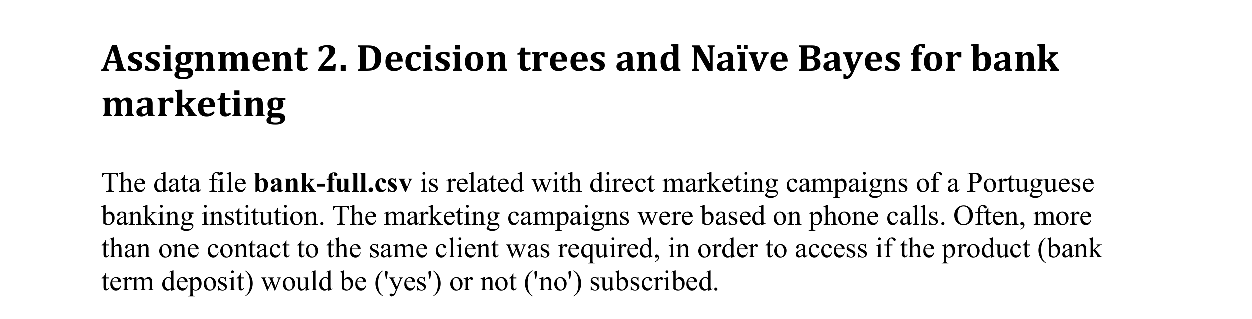

In [1]:
par(family  = "Arial")
#install.packages("showtext")
library(showtext)
showtext_auto()

Loading required package: sysfonts
Loading required package: showtextdb


In [2]:
bank = read.csv2(file = "bank-full.csv")

In [3]:
head(bank)

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no


In [4]:
bank$duration = NULL
#bank = subset(bank,select=-which(names(bank) == 'duration'))

In [5]:
head(bank,3)

age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no


In [6]:
# Convert character variables to factors

#not necessary here
# for (var in 1:ncol(bank)) {
# if(is.character(bank[,var])){
# bank[,var] <- as.factor(bank[,var])
# }


# second way to convert character column
character_vars = lapply(bank, class) == "character"
bank[, character_vars] = lapply(bank[, character_vars], as.factor)
str(bank)


'data.frame':	45211 obs. of  16 variables:
 $ age      : int  58 44 33 47 33 35 28 42 58 43 ...
 $ job      : Factor w/ 12 levels "admin.","blue-collar",..: 5 10 3 2 12 5 5 3 6 10 ...
 $ marital  : Factor w/ 3 levels "divorced","married",..: 2 3 2 2 3 2 3 1 2 3 ...
 $ education: Factor w/ 4 levels "primary","secondary",..: 3 2 2 4 4 3 3 3 1 2 ...
 $ default  : Factor w/ 2 levels "no","yes": 1 1 1 1 1 1 1 2 1 1 ...
 $ balance  : int  2143 29 2 1506 1 231 447 2 121 593 ...
 $ housing  : Factor w/ 2 levels "no","yes": 2 2 2 2 1 2 2 2 2 2 ...
 $ loan     : Factor w/ 2 levels "no","yes": 1 1 2 1 1 1 2 1 1 1 ...
 $ contact  : Factor w/ 3 levels "cellular","telephone",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ day      : int  5 5 5 5 5 5 5 5 5 5 ...
 $ month    : Factor w/ 12 levels "apr","aug","dec",..: 9 9 9 9 9 9 9 9 9 9 ...
 $ campaign : int  1 1 1 1 1 1 1 1 1 1 ...
 $ pdays    : int  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 ...
 $ previous : int  0 0 0 0 0 0 0 0 0 0 ...
 $ poutcome : Factor w/ 4 levels "failur

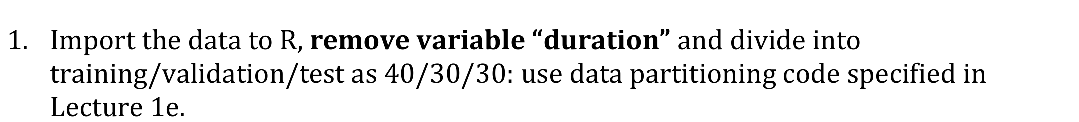

In [7]:
# Train, validation, test sets
n=dim(bank)[1]
set.seed(12345)
id=sample(1:n, floor(n*0.4))
train=bank[id,]
id1=setdiff(1:n, id)
set.seed(12345)
id2=sample(id1, floor(n*0.3))
valid=bank[id2,]
id3=setdiff(id1,id2)
test=bank[id3,]


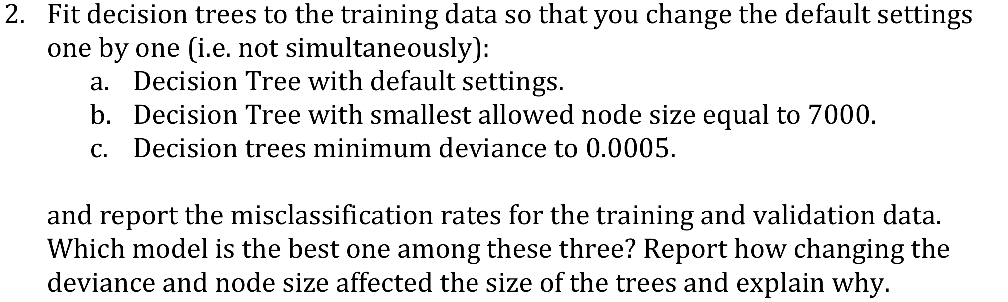

In [8]:
#install.packages('tree')
set.seed(12345)
library(tree)
tree1 = tree(y ~.,data = train, control = tree.control(nobs = n))
tree2 = tree(y ~. ,data = train,control = tree.control(nobs = n,minsize = 7000))
tree3 = tree(y ~., data = train,control = tree.control(nobs = n,mindev = 0.0005) )

In [9]:
#misclassification rates:

error = matrix(0,2,3)
colnames(error) = c("Default","Node","Deviance")
rownames(error) = c('train','valid')

Yfit1 = predict(tree1,newdata = train, type = 'class')
Yfit2 = predict(tree3,newdata = train, type = 'class')
Yfit3 = predict(tree3,newdata = train, type = 'class')

e1 = sum(Yfit1 != train$y)/length(train$y)
error[1,1] = e1
e2 = sum(Yfit2 != train$y)/length(train$y)
error[1,2] = e2
e3 = sum(Yfit3 != train$y)/length(train$y)
error[1,3] = e3

vfit1 = predict(tree1,newdata = valid, type = 'class')
vfit2 = predict(tree3,newdata = valid, type = 'class')
vfit3 = predict(tree3,newdata = valid, type = 'class')

v1 = sum(vfit1 != valid$y)/length(valid$y)
error[2,1] = v1
v2 = sum(vfit2 != valid$y)/length(valid$y)
error[2,2] = v2

v3 = sum(vfit3 != valid$y)/length(valid$y)
error[2,3] = v3


In [10]:
error

,Default,Node,Deviance
train,0.1048441,0.09350807,0.09356337
valid,0.1092679,0.11170095,0.11170095


In [11]:
table(Yfit1,train$y)

     
Yfit1    no   yes
  no  15795  1673
  yes   223   393

In [12]:
table(Yfit2,train$y)

     
Yfit2    no   yes
  no  15824  1497
  yes   194   569

In [13]:
table(Yfit3,train$y)

     
Yfit3    no   yes
  no  15826  1500
  yes   192   566

In [14]:
table(vfit1,valid$y)

     
vfit1    no   yes
  no  11772  1329
  yes   153   309

In [15]:
table(vfit2,valid$y)

     
vfit2    no   yes
  no  11718  1308
  yes   207   330

In [16]:
table(vfit3,valid$y)

     
vfit3    no   yes
  no  11718  1308
  yes   207   330

From this result the default/nodesize trees performs best on validation data while
deviance model does the opposite. Judging by these result the Deviance-model would be
overfitting compared to the other two which also could be seen in the graphical
illustrations below. The deviance model do have more potential to be optimized as this tree
is much larger. The default and nodesize does only differ by one node which can explain
why they perform identically!


Increasing the minimum node size results in a smaller tree as the data is divided in to
larger areas (each area represent a terminal node) and there are less “classification
squares” to decide a label between.


Decreasing the deviance forces the model to split nodes more often which will result in a
larger tree as seen below. This does introduce more risk for overfitting. The deviance is
calculated by  $$Deviance = -\sum_{i=1}^n p(c_i)log(p(c_i))$$ where $p(c_i)$ is the probability of class $c_i$ in the node. Using a lower value for deviance forces the probability for classification to be higher which results in more splits.



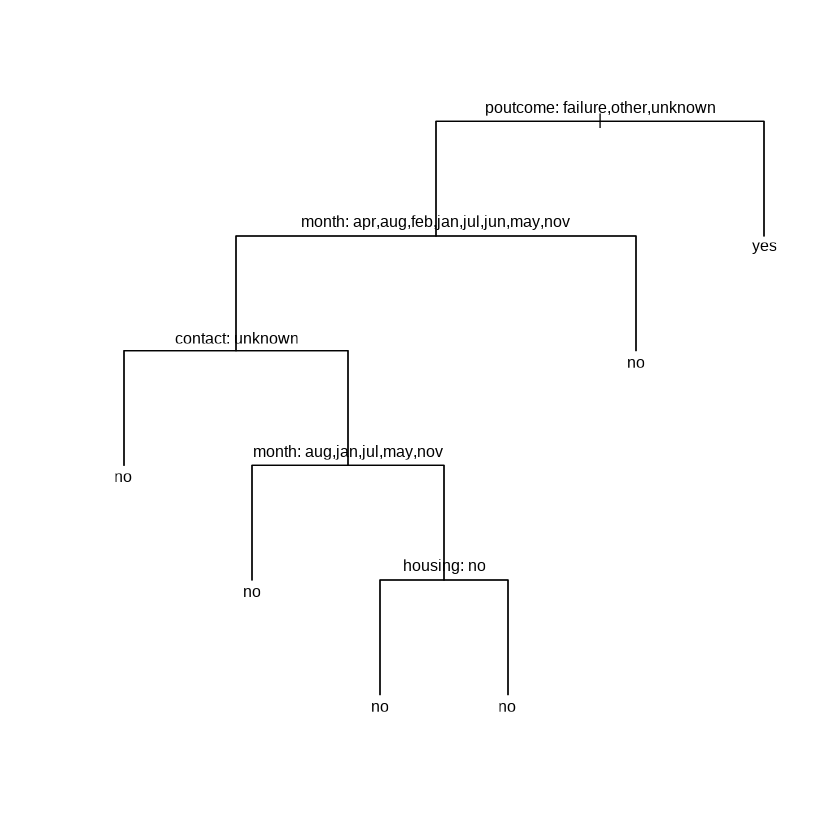

In [17]:
plot(tree1, type = "uniform",main = "default")
text(tree1, pretty=0)


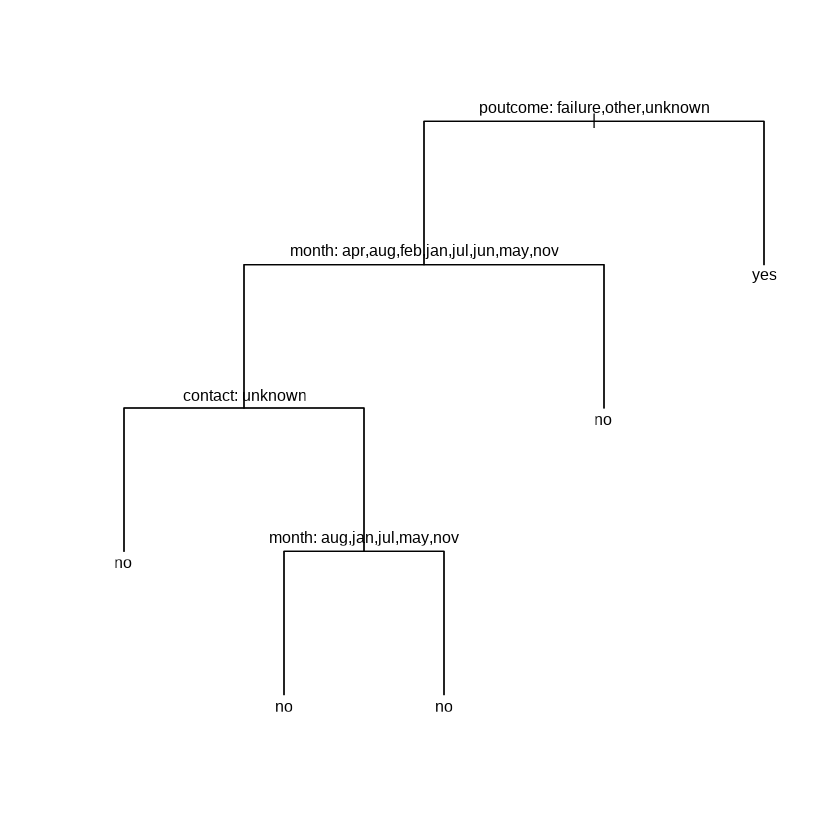

In [18]:
plot(tree2, type = "uniform",main = "nodesize")
text(tree2, pretty=0)


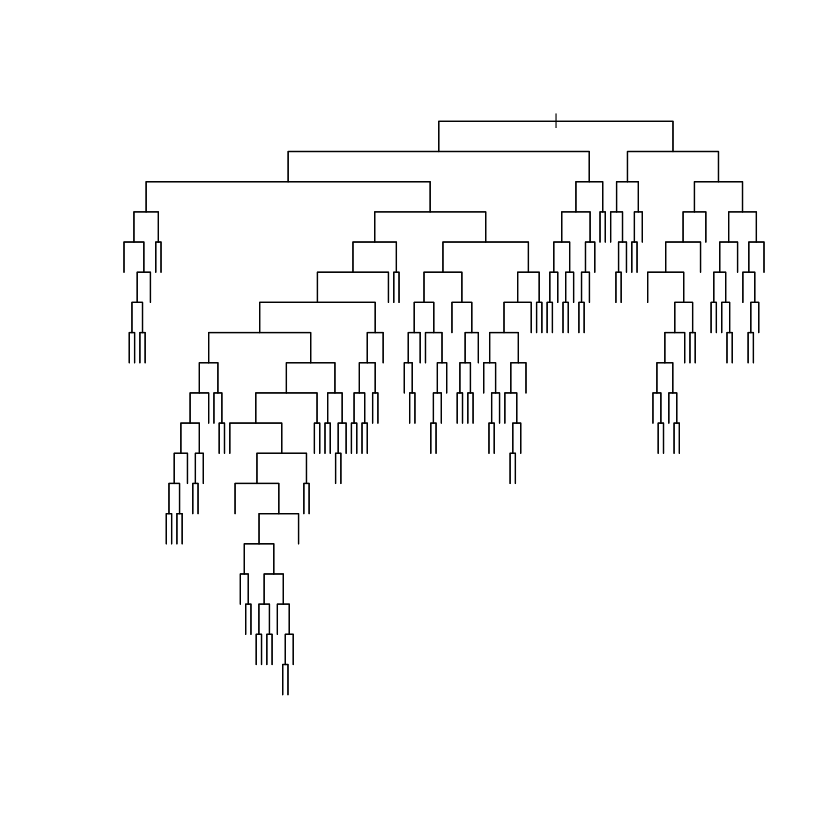

In [19]:
plot(tree3, type = "uniform",,main = "deviance")


In [20]:
summary(tree3)
#tree3


Classification tree:
tree(formula = y ~ ., data = train, control = tree.control(nobs = n, 
    mindev = 5e-04))
Variables actually used in tree construction:
 [1] "poutcome"  "month"     "contact"   "marital"   "day"       "campaign" 
 [7] "job"       "pdays"     "age"       "balance"   "housing"   "education"
[13] "previous" 
Number of terminal nodes:  122 
Residual mean deviance:  0.5213 = 9363 / 17960 
Misclassification error rate: 0.09362 = 1693 / 18084 

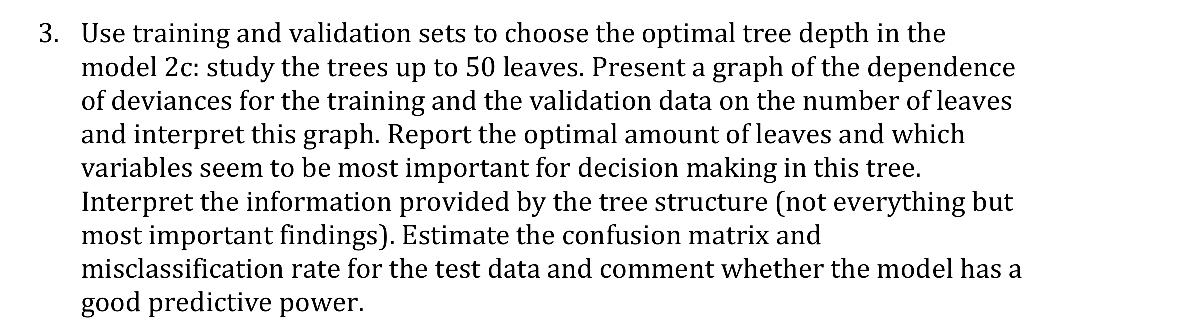

## Selecting optimal tree by train/validation


In [21]:
trainScore=rep(0,50)
testScore=rep(0,50)


In [22]:
for(i in 2:50){
    
    prunedTree=prune.tree(tree3,best=i)
    pred=predict(prunedTree, newdata=valid,
                 type="tree")
    trainScore[i]=deviance(prunedTree)
    testScore[i]=deviance(pred)

}

In [23]:
testScore

[1]    0.000 9194.025 8829.533 8632.631 8529.933 8467.871 8458.944 8420.474
 [9] 8381.704 8344.832 8345.130 8309.708 8266.135 8266.135 8261.849 8229.988
[17] 8244.393 8236.669 8215.094 8203.290 8203.290 8202.509 8221.244 8221.244
[25] 8232.538 8237.994 8237.994 8237.994 8237.994 8225.944 8224.780 8228.263
[33] 8227.670 8227.670 8230.755 8231.561 8231.561 8270.923 8277.561 8279.574
[41] 8298.591 8298.591 8294.525 8321.936 8321.936 8376.773 8376.773 8370.903
[49] 8370.903 8370.903

As seen in the figure below the trees total deviance decreases rapidly during the first part
as the model is able to distinguish between more features. As the number of leaves
increases the training data’s deviance keeps decreasing while the validation data starts to
increase after around 20 leafs. This is where the optimal tree size is found. The reason why
the training-deviance is larger than the validations is due to the training set being larger
therefore more values to sum up.


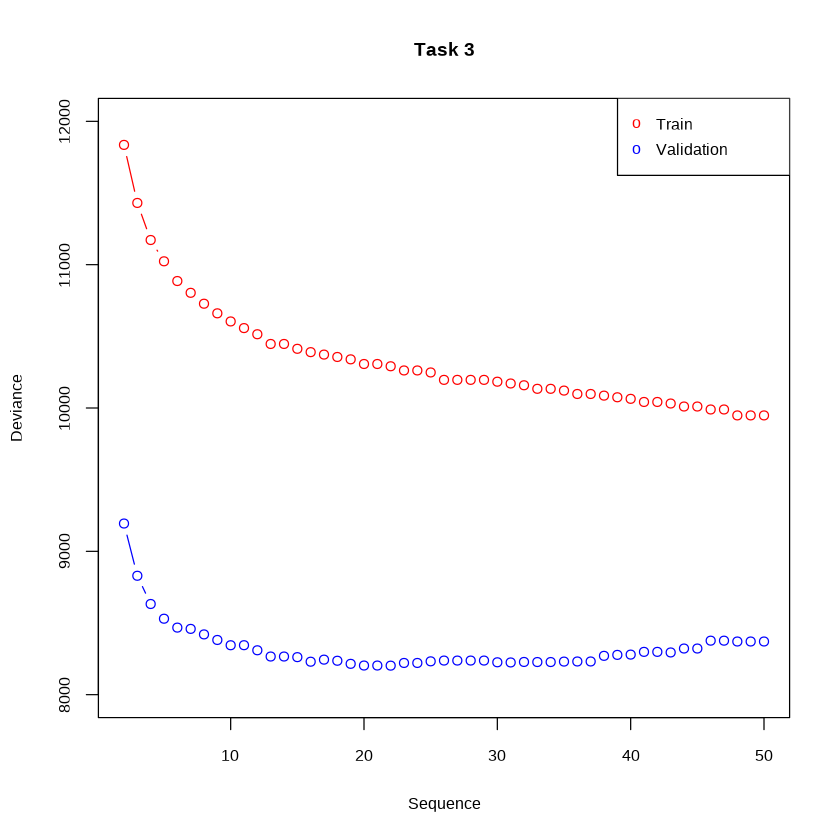

In [24]:
plot(2:50, trainScore[2:50], type = "b", col = "red", ylim = c(8000,12000), 
     main = "Task 3", xlab = "Sequence", ylab = "Deviance")
points(2:50, testScore[2:50], type = "b", col = "blue")
legend("topright", c("Train","Validation"), pch = c("o","o"),
       col= c("red","blue"))


## Optimal value for the Leaves

The optimal size (number of leaves/terminal nodes) is found where at the minimum deviance.
The optimal number of leaves and the most significant features is shown in the summary of the optimal model:

In [25]:
opt_leaf = which.min(testScore[2:50])
opt_mdl = prune.tree(tree3, best = opt_leaf)
summary(opt_mdl)


Classification tree:
snip.tree(tree = tree3, nodes = c(581L, 17L, 577L, 79L, 37L, 
77L, 576L, 153L, 580L, 6L, 1157L, 16L, 5L, 1156L, 156L, 152L, 
579L, 7L))
Variables actually used in tree construction:
[1] "poutcome" "month"    "contact"  "pdays"    "age"      "day"      "balance" 
[8] "housing" 
Number of terminal nodes:  21 
Residual mean deviance:  0.5706 = 10310 / 18060 
Misclassification error rate: 0.1041 = 1882 / 18084 

The tree structure seems to use more terminal nodes than necessary as there are a lot of nodes which leads to the same label/ typ of terminal node, could be due to the deviance setting. The number of terminal nodes are indeed the same as the optimal which where found above.
The **outcome feature seems to be the most significant as it is set as the root node** This feature indicate wherever the customer was persuaded to subscribe a term deposit, which seems like a good starting point.

In [26]:
opt_mdl

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

   1) root 18084 12850.00 no ( 0.88576 0.11424 )  
     2) poutcome: failure,other,unknown 17468 11030.00 no ( 0.90422 0.09578 )  
       4) month: apr,aug,feb,jan,jul,jun,may,nov 16828  9772.00 no ( 0.91520 0.08480 )  
         8) contact: unknown 5130  1599.00 no ( 0.96374 0.03626 )  
          16) month: jul,jun,may 5074  1502.00 no ( 0.96610 0.03390 ) *
          17) month: apr,aug,feb,jan,nov 56    62.98 no ( 0.75000 0.25000 ) *
         9) contact: cellular,telephone 11698  7914.00 no ( 0.89391 0.10609 )  
          18) month: aug,jan,jul,may,nov 9284  5503.00 no ( 0.91265 0.08735 )  
            36) pdays < 383.5 9246  5373.00 no ( 0.91510 0.08490 )  
              72) age < 60.5 9097  5107.00 no ( 0.91920 0.08080 )  
               144) day < 27.5 7670  4588.00 no ( 0.91147 0.08853 )  
                 288) age < 29.5 754   637.10 no ( 0.85013 0.14987 )  
                   576) month: jan,jul,may 681   528

The "root" node does not have any splits so it has the maximum deviance. Each node there after, reduces the devianc
higher purity -> lower devianc

cross-entropy (deviance)


In [27]:
which.min(testScore[2:50])

[1] 21

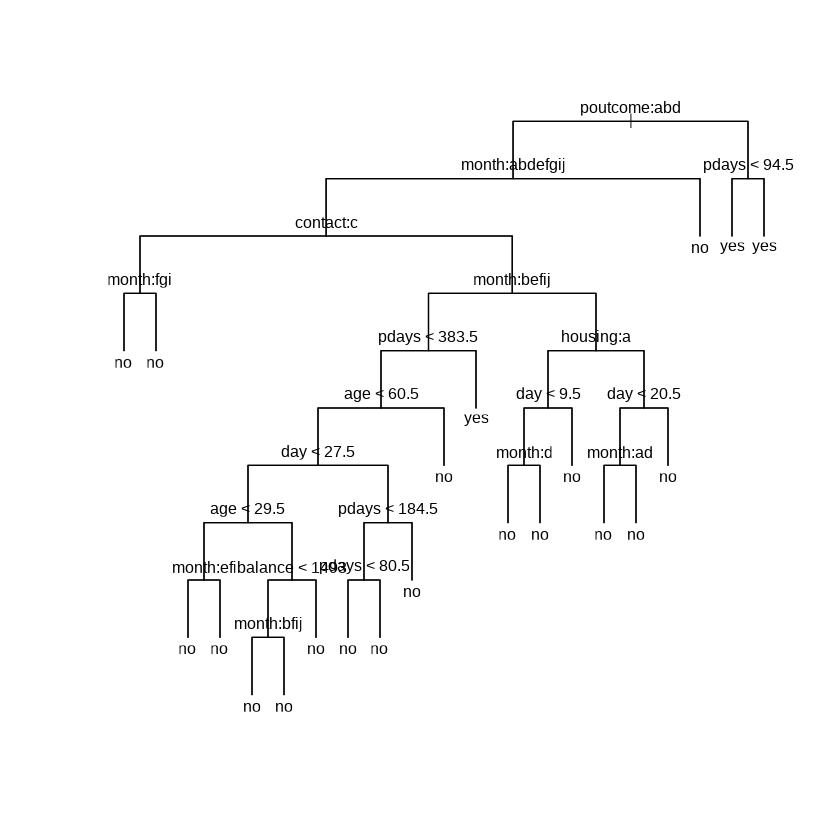

In [28]:
plot(opt_mdl, type = "uniform")
text(opt_mdl)

In [29]:
pred_valid = predict(opt_mdl, newdata = valid, type = "class")
val_error = sum(pred_valid != valid$y)/length(valid$y)
val_conf_matrix = table(valid$y, pred_valid)
val_conf_matrix
sprintf("Misclassification rate: %.4f", val_error)

     pred_valid
         no   yes
  no  11758   167
  yes  1319   319

[1] "Misclassification rate: 0.1096"

The prediction power of this model is ok, it does get the right answer in about 9/10 cases but its' main failure is by classifying False Negatives(which wrongly indicates that a condition does not hold. ).

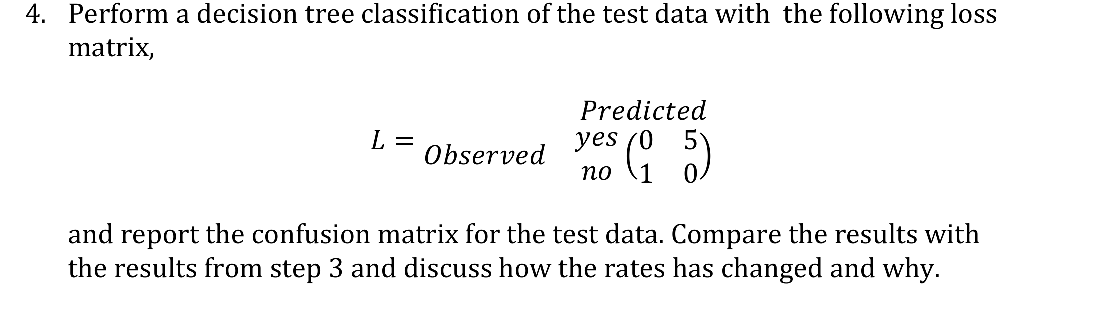

In [30]:
#install.packages('rpart')
library(rpart)

In [31]:
lossMatrix = matrix(c(0,5,1,0),2,2)

fit_matrix = rpart(formula = y~., data = train, parms = list(loss = lossMatrix))
pred_matrix = predict(fit_matrix, newdata = test, type = "class")
error = sum(pred_matrix != test$y)/length(test$y)
cm_matrix = table(test$y, pred_matrix)
cm_matrix
sprintf("Misclassification rate: %.4f", error)

     pred_matrix
         no   yes
  no  10880  1099
  yes   807   778

[1] "Misclassification rate: 0.1405"

By introducing a loss matrix to penalize the False Negative predictions the misclassification rate did increase but the number of False Negative classifications decreased!
Using a loss matrix will direct the focus of learning towards the weighting of the matrix, in this case classifying False Negatives gives a five time larger penalty than False Positive and this will affect the overall classification which is why error rate increased.

Using the loss matrix does give a good result as the previous model have been trained on both the training and validation set while this model only have been exposed to the training set, suggesting that it learn faster (but more knowledge about the data is required to set up the loss matrix).


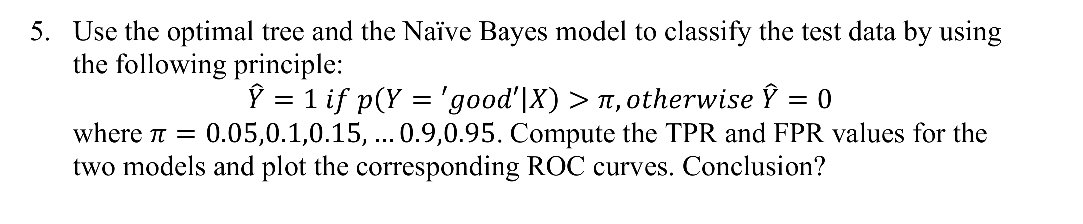

In [32]:
# install.packages("e1071")
# install.packages("caTools")
# install.packages("caret")
library(e1071)
library(caTools)
library(caret)

Loading required package: lattice
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [33]:
fit_naive = naiveBayes(formula = y~., data = train)

opt_pred = predict(opt_mdl, newdata = test, type = "vector")
naive_pred = predict(fit_naive, newdata = test, type = "raw")

PI = seq(0, 0.95, 0.05)
n = length(PI)
TPR_tree = numeric(n)
FPR_tree = numeric(n)
TPR_naive = numeric(n)
FPR_naive = numeric(n)
y = test$y


In [34]:

for(i in 1:length(PI)){
  TP_tree = 0
  FP_tree = 0
  TP_naive = 0
  FP_naive = 0
  
  for(j in 1:length(test$y)){
      
    if(opt_pred[j,2] >= PI[i]){ 
      if(y[j] == "yes"){ 
        TP_tree = TP_tree + 1
        }
      else{
        FP_tree = FP_tree + 1
        }
      }
    
    if(naive_pred[j,2] >= PI[i]){ 
      if(y[j] == "yes"){ 
        TP_naive = TP_naive + 1 
        }
      else{ 
        FP_naive = FP_naive + 1 
        }
    }
      
  }
  TPR_tree[i] = TP_tree/sum(test$y == "yes")
  FPR_tree[i] = FP_tree/sum(test$y == "no")
  
  TPR_naive[i] = TP_naive/sum(test$y == "yes")
  FPR_naive[i] = FP_naive/sum(test$y == "no")
}

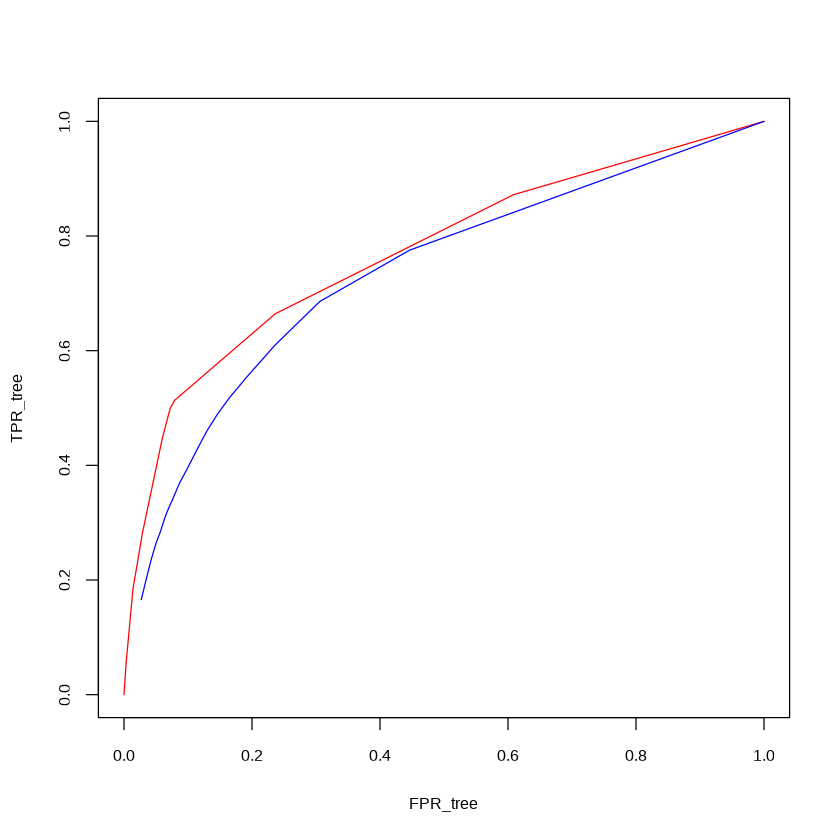

In [40]:
plot(FPR_tree,TPR_tree,col = 'red',type = 'l')
lines(FPR_naive,TPR_naive,col='blue',type = 'l')

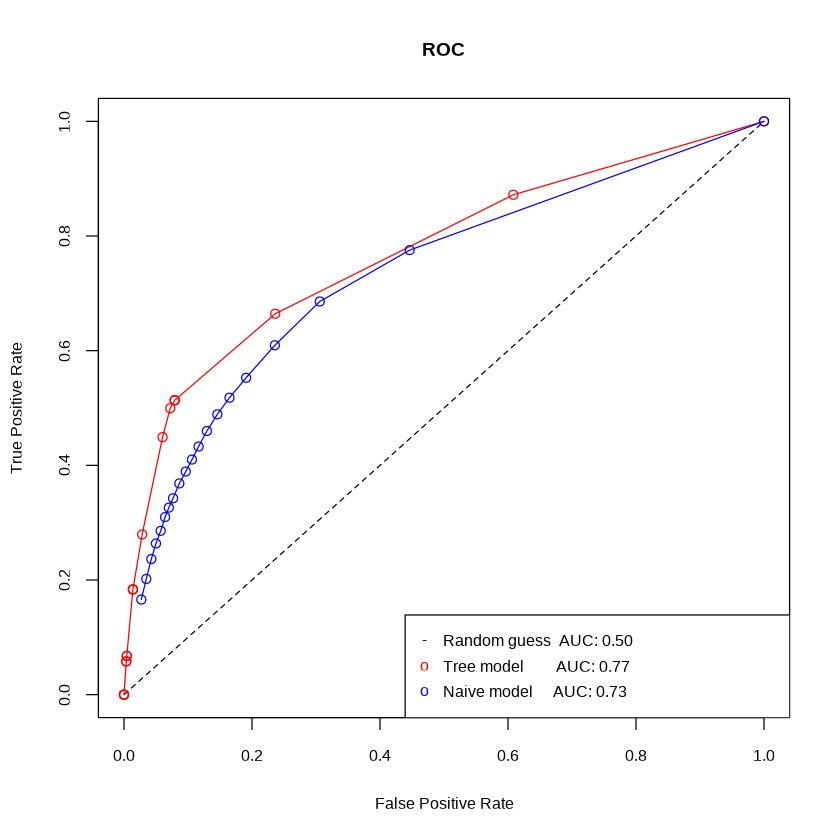

In [41]:
sub_model = seq(0,1,0.01)
AUC_tree = sum(abs(diff(FPR_tree)) * (head(TPR_tree,-1)+tail(TPR_tree,-1)))/2
AUC_naive = sum(abs(diff(FPR_naive)) * (head(TPR_naive,-1)+tail(TPR_naive,-1)))/2
AUC_sub = sum(abs(diff(sub_model)) * (head(sub_model,-1)+tail(sub_model,-1)))/2

plot(sub_model, sub_model, col = "black", type = "l", lty = 2, main = "ROC", xlab = "False Positive Rate", ylab = "True Positive Rate")
lines(FPR_tree, TPR_tree, col = "red", type = "o")
lines(FPR_naive, TPR_naive, col = "blue", type = "o")

leg_text = c(sprintf("Random guess  AUC: %.2f", AUC_sub),sprintf("Tree model        AUC: %.2f", AUC_tree),sprintf("Naive model     AUC: %.2f", AUC_naive))

legend("bottomright", legend = leg_text, pch = c("-","o","o"), col = c("black", "red", "blue"))


As can be seen in the graph below the optimal tree model seems to be the best model as the "area under curve" (AUC) is greater than the naive's model. Comparing two models AUC could occasionally lead the wrong assumption within certain regions but in practice the AUC-measure performs well as a general comparison. The AUC is calculated using the trapezoidal rule.
In this case the tree models ROC curve is always above the naive's which also indicates that the tree model would perform best.
Both models are well above the dashed line which could be interpret as a minimum boarder for a models predictive power, if a models is below this line the predictive power is worse than random guessing.

## notes on tree

- Tree-based methods are simple and useful for interpretation. However,they typically are not competitive with the best supervised learning approaches
- combining a large number of trees can often result in dramatic improvements in prediction accuracy, at the expense of some loss in interpretation.
- A smaller tree with fewer splits (that is, fewer regions R1 , . . . , RJ ) might lead to lower variance and better interpretation at the cost of a little bias. 
- One possible alternative to the process described above is to build the tree only so long as the decrease in the RSS due to each split exceeds some (high) threshold

## predicting Salary for a player
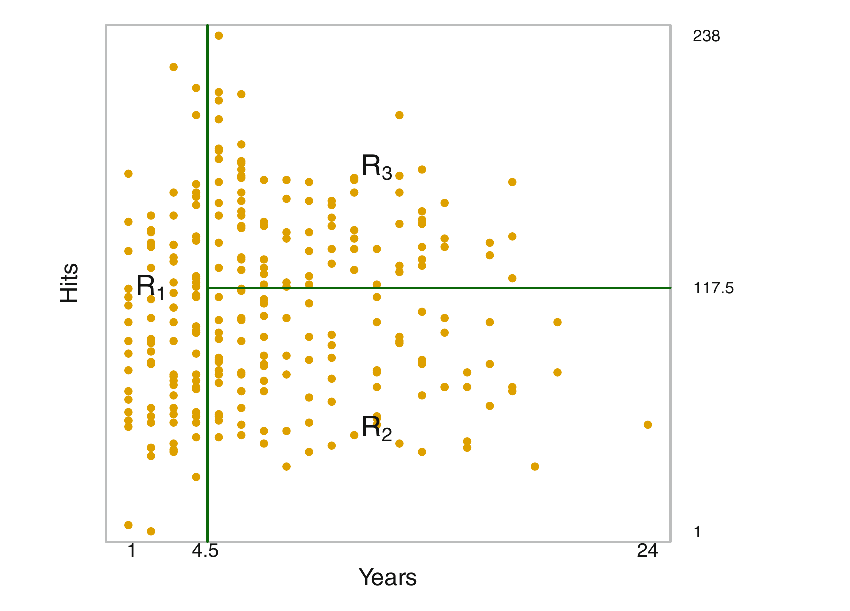

interpret the regression tree displayed in Figure above as follows:

Years is the most important factor in determining Salary, and players with
less experience earn lower salaries than more experienced players. Given
that a player is less experienced, the number of hits that he made in the
previous year seems to play little role in his salary. But among players who
have been in the major leagues for five or more years, the number of hits
made in the previous year does affect salary, and players who made more
hits last year tend to have higher salaries.

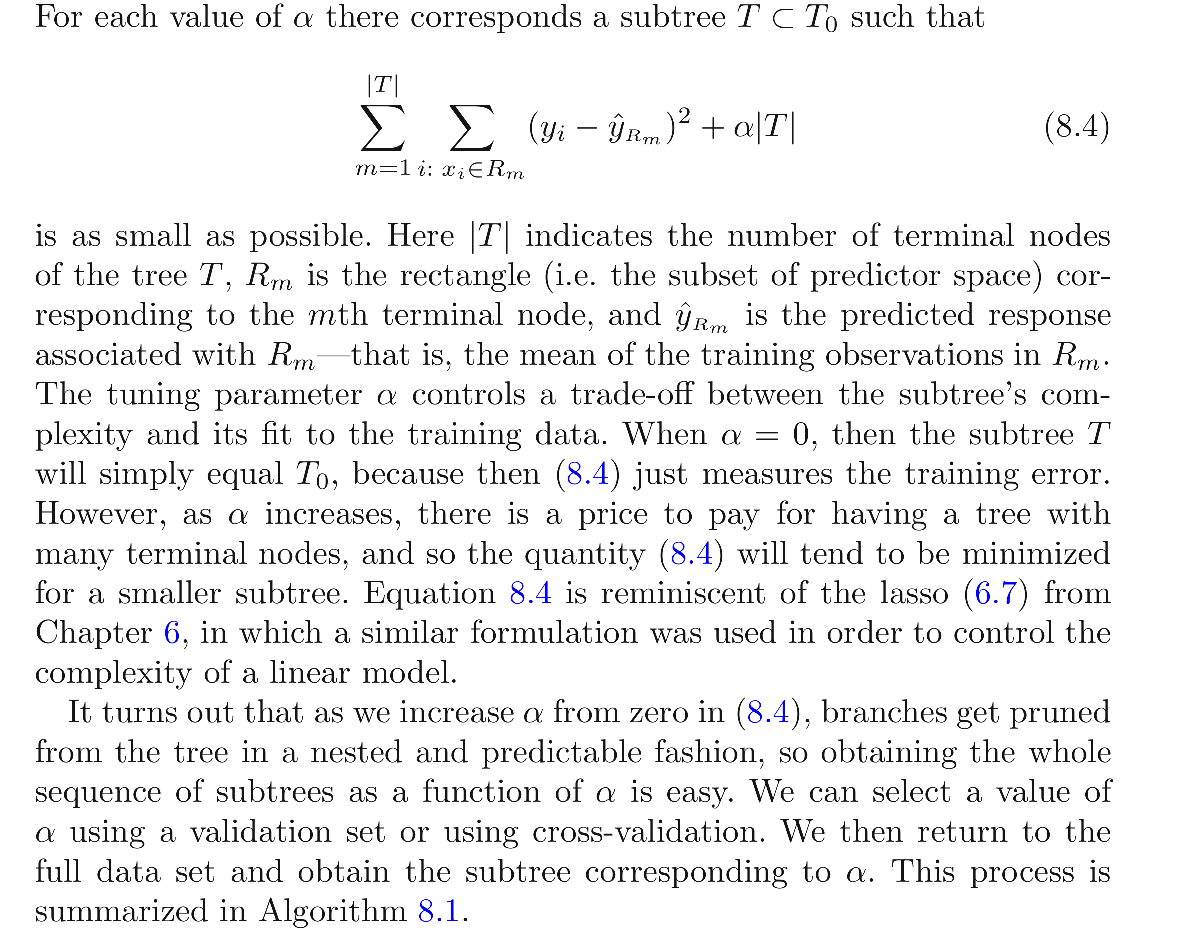

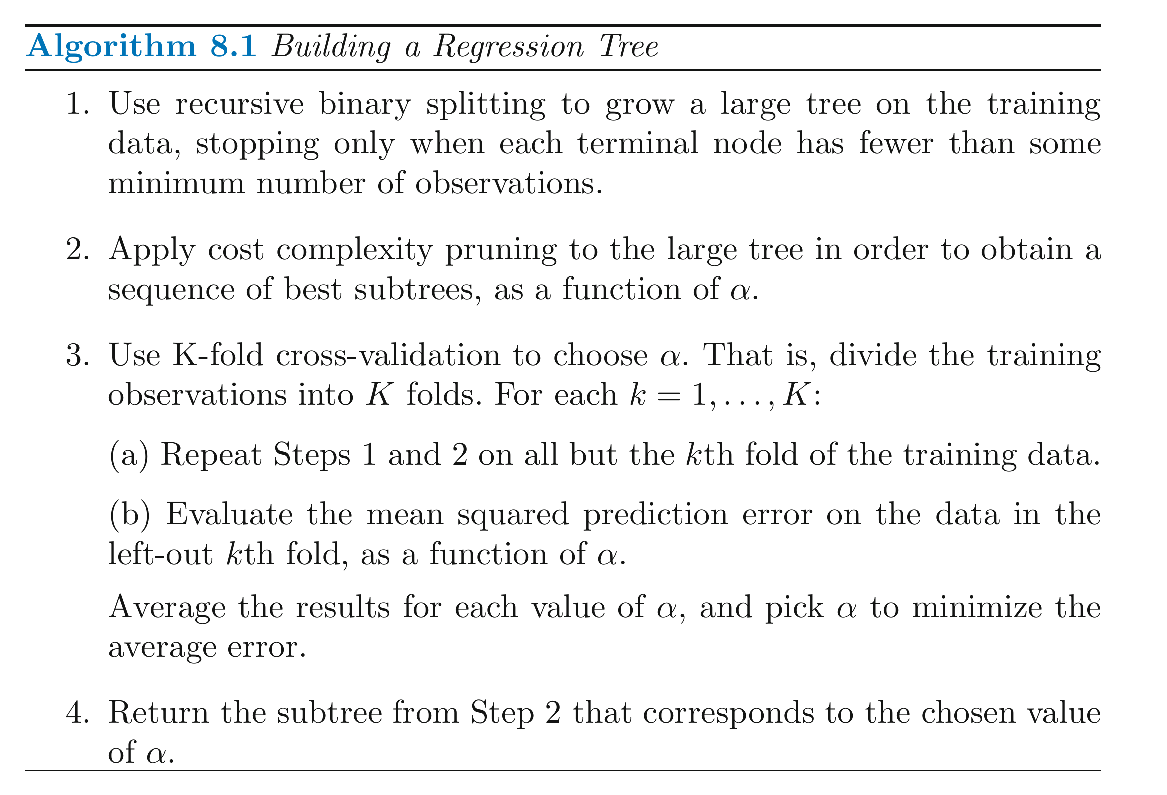

# classification error:
 
 the class is decided by the most common occuring class. RSS not valid here. we will use classification error:

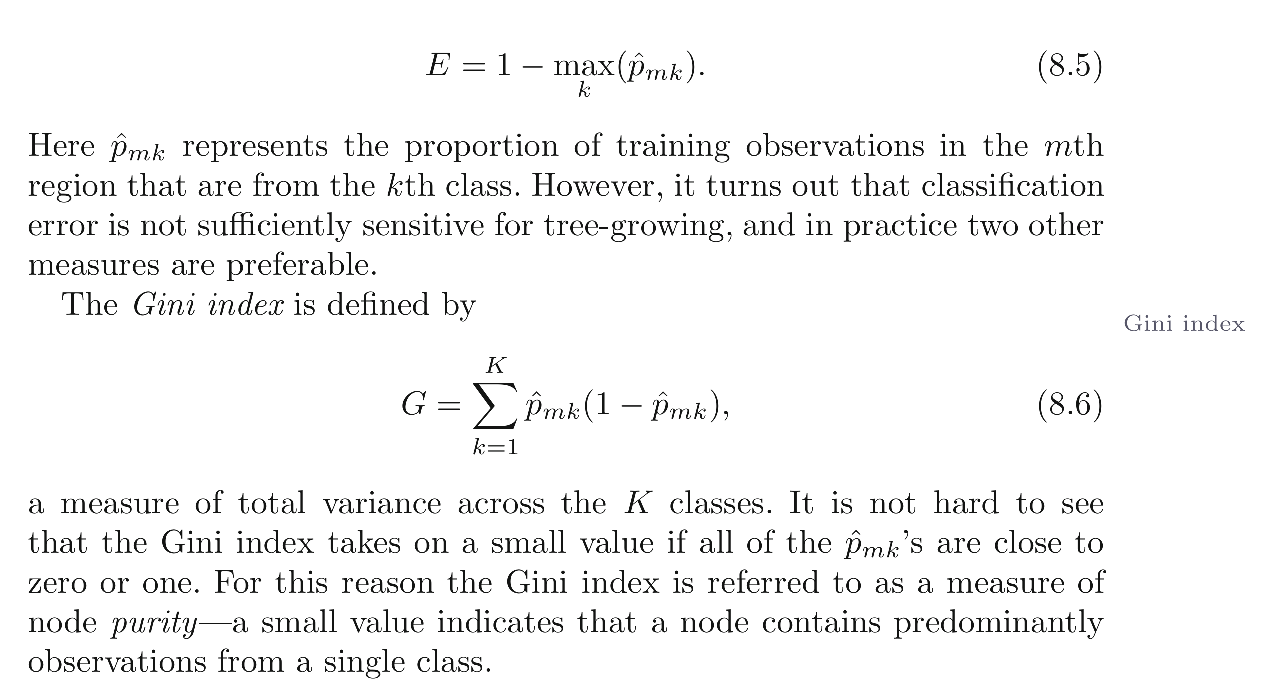

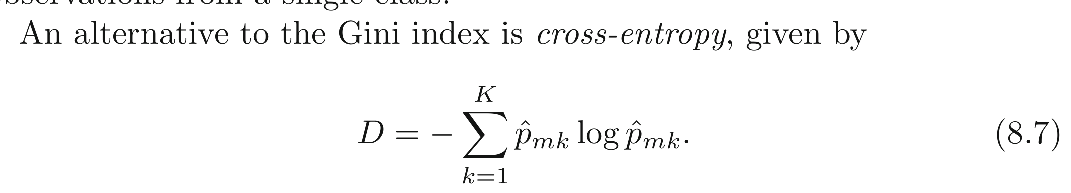

Therefore, like the Gini index, the cross-entropy will take
on a small value if the mth node is pure. In fact, it turns out that the Gini
index and the cross-entropy are quite similar numerically.


When building a classification tree, either the Gini index or the cross-
entropy are typically used to evaluate the quality of a particular split,
since these two approaches are more sensitive to node purity than is the
classification error rate. Any of these three approaches might be used when
pruning the tree, but the classification error rate is preferable if prediction
accuracy of the final pruned tree is the goal.


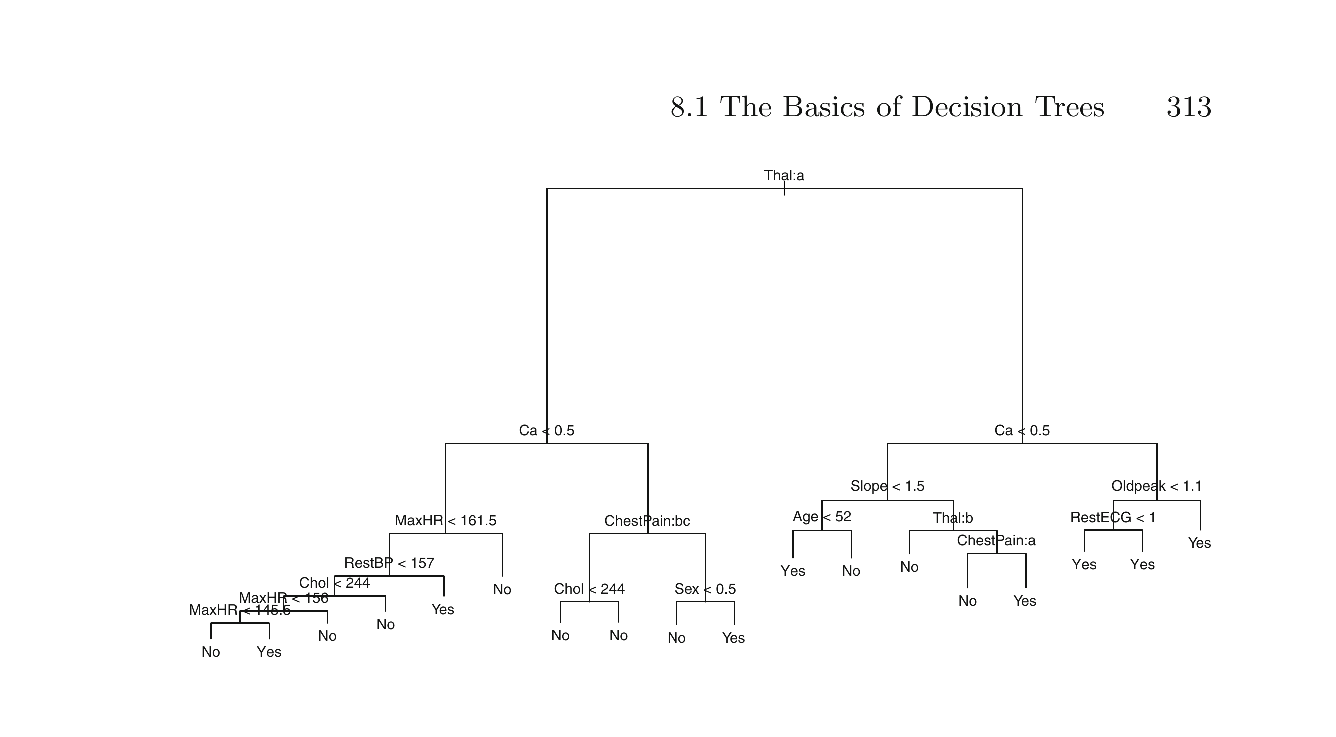

Figure 8.6 has a surprising characteristic: some of the splits yield two
terminal nodes that have the same predicted value. For instance, consider
the split RestECG<1 near the bottom right of the unpruned tree. Regardless
of the value of RestECG, a response value of Yes is predicted for those ob-
servations. Why, then, is the split performed at all? The split is performed
because it leads to increased node purity. That is, all 9 of the observations
corresponding to the right-hand leaf have a response value of Yes, whereas
7/11 of those corresponding to the left-hand leaf have a response value of
Yes. 

### Why is node purity important? 

Suppose that we have a test observation that belongs to the region given by that right-hand leaf. Then we
can be pretty certain that its response value is Yes. In contrast, if a test
observation belongs to the region given by the left-hand leaf, then its response value is probably Yes, but we are much less certain. Even though
the split RestECG<1 does not reduce the classification error, it improves the
Gini index and the cross-entropy, which are more sensitive to node purity.


# Trees Versus Linear Models

## Linear Regression
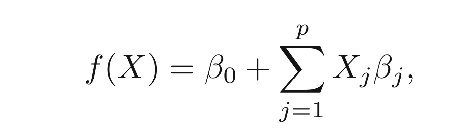

## Tree regression

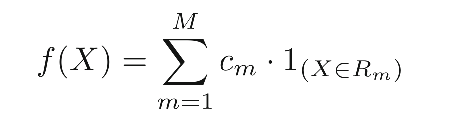

Which model is better? It depends on the problem at hand. If the
relationship between the features and the response is well approximated
by a linear model as in (8.8), then an approach such as linear regression
will likely work well, and will outperform a method such as a regression
tree that does not exploit this linear structure. If instead there is a highly
non-linear and complex relationship between the features and the response
as indicated by model (8.9), then decision trees may outperform classical
approaches. An illustrative example is displayed in Figure 8.7. The rela-
tive performances of tree-based and classical approaches can be assessed by
estimating the test error, using either cross-validation or the validation set
approach .

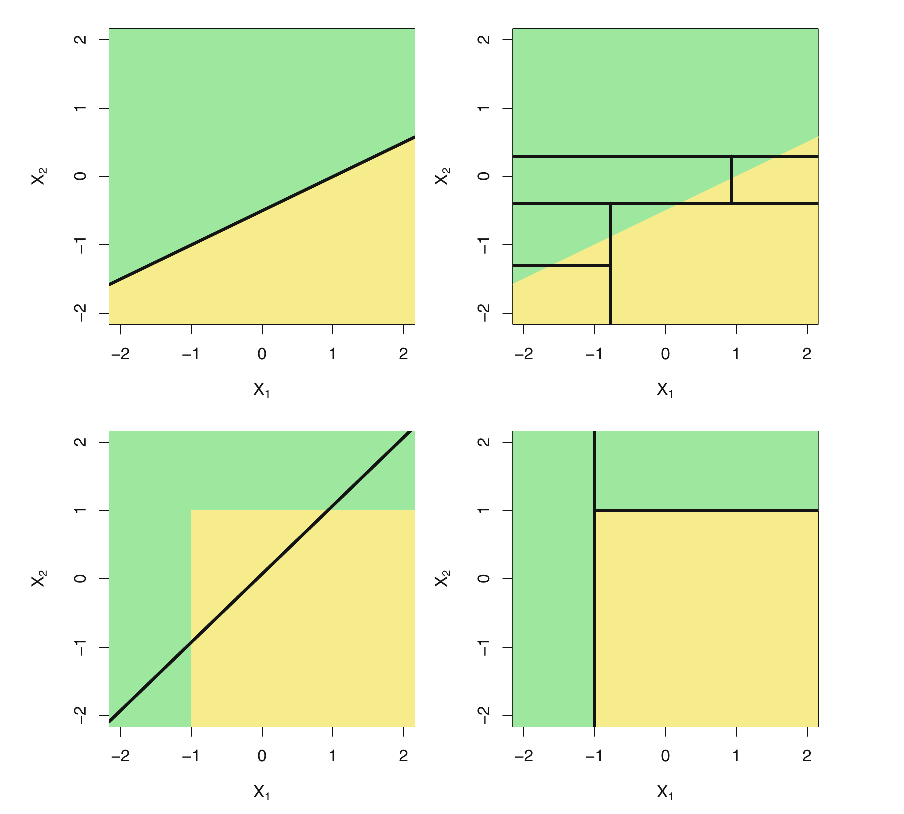

## Advantages and Disadvantages of Trees

### Decision trees for regression and classification have a number of advantages

- Trees are very easy to explain to people. In fact, they are even easier to explain than linear regression!
- Some people believe that decision trees more closely mirror human decision-making than do the regression and classification approaches seen in previous chapters.
- Trees can be displayed graphically, and are easily interpreted even by a non-expert (especially if they are small).
- Trees can easily handle qualitative predictors without the need to create dummy variables.


## Disadvantage of using a tree

- Unfortunately, trees generally do not have the same level of predictive accuracy as some of the other regression and classification.
- Trees can be very non-robust
